In [4]:
import pandas as pd
%matplotlib inline
#import matplotlib
import matplotlib.pyplot as plt
import numpy as np


## Analysis 

In [13]:
#read the cleaned csv file into pandas data frame
df = pd.read_csv('master_df.csv')

In [14]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,tweet_id_x,timestamp,source,text,expanded_urls,name,rating,dog_type,jpg_url,img_num,breed,confidence,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,None,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh_springer_spaniel,0.465074,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,9774.0,41048.0


### Question to be asked and I'm interested to find an answer for:
- Which dog type has the highest rating ?
- Is there any correlation between retweet count and bread type


#### The highest rating dogs breeds:

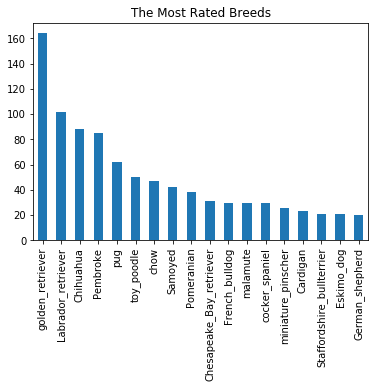

In [15]:
# create temp_df which will have all the breads except the unidentifiable 
temp_df = df[df.breed != 'Unidentifiable']
top=temp_df.groupby('breed').filter(lambda x: len(x) >= 20)
top['breed'].value_counts().plot(kind = 'bar')
plt.title('The Most Rated Breeds');


###### As we can see from the above bar charts, after excluding the unknown dogs bread from the data frame, golden retriever bread has the highest rating among other dogs breads with approximately 360 ratings. However, the lowst rating went to german shepered breeds. It is interesting though that golden retriever is more friendly thats explain why has the highest rating. In the other hand, german shepered is dogs bread that mostly used for guarding place and it may get aggressive with strangers which is not the case with golden retriever 

In [16]:
top.groupby('breed')['rating'].describe()


,count,mean,std,min,25%,50%,75%,max
breed,,,,,,,,
Cardigan,23.0,1.021739,0.227549,0.5,1.000,1.0,1.200,1.3
Chesapeake_Bay_retriever,31.0,1.148387,0.174873,0.8,1.100,1.2,1.200,1.7
Chihuahua,88.0,1.126136,0.219976,0.2,1.100,1.2,1.300,1.4
Eskimo_dog,21.0,1.066667,0.215252,0.5,1.000,1.1,1.200,1.3
French_bulldog,30.0,0.993333,0.221178,0.5,0.825,1.0,1.200,1.3
German_shepherd,20.0,0.985000,0.315019,0.2,0.975,1.1,1.200,1.3
Labrador_retriever,102.0,1.144118,0.658166,0.5,1.000,1.1,1.200,7.5
Pembroke,85.0,1.052941,0.215798,0.3,1.000,1.1,1.200,1.4
Pomeranian,38.0,1.152632,0.160635,0.7,1.025,1.2,1.300,1.4


#### Look for correlation in the data

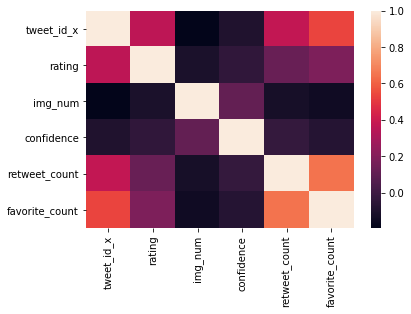

In [17]:
import seaborn as sns
corr = top.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

###### As we can see from the above correlation matrix, there is no much correlation between the collected data elements.

#### The highest rating dogs type:

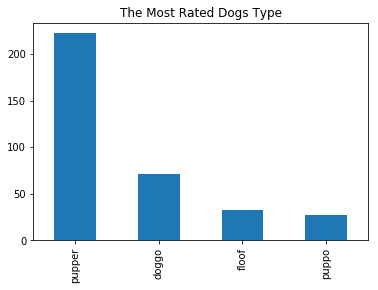

In [18]:
# create temp_df which will have all the breads except the unidentifiable 
temp_df = df[(df.breed != 'Unidentifiable') & (df.dog_type != 'None')]
top=temp_df.groupby('dog_type').filter(lambda x: len(x) >= 20)
top['dog_type'].value_counts().plot(kind = 'bar')
plt.title('The Most Rated Dogs Type');


##### As we can see from the graph above, dog type pupper is the most rated dog type. I would assume this is the nature of all human beings, they provide so much love for thier babies during their early stage in life and pupper is the same case . 